# Quadratic Function Optimization (simple example)

## Imports

In [31]:
import optuna

## Optimization

In [11]:
def objective(trial):
    """
    Функция, минимум которой необходимо найти с помощью Optuna.
    Очевидно, что минимальное значение функция примет при х == 2.
    Посмотрим, как с этим справится Optuna.
    """
    x = trial.suggest_float("x", -10, 10)
    return (x - 2) ** 2


study = optuna.create_study(direction="minimize")
study.optimize(func=objective, n_trials=100, show_progress_bar=True)

[I 2022-05-24 11:32:49,552] A new study created in memory with name: no-name-ab7eeb4d-6913-4abf-ab08-a28aba9bc63b


[I 2022-05-24 11:32:49,578] Trial 0 finished with value: 55.19601315820601 and parameters: {'x': -5.429401938124361}. Best is trial 0 with value: 55.19601315820601.
[I 2022-05-24 11:32:49,582] Trial 1 finished with value: 11.159622260268167 and parameters: {'x': -1.3406020805040768}. Best is trial 1 with value: 11.159622260268167.
[I 2022-05-24 11:32:49,587] Trial 2 finished with value: 45.01120065852913 and parameters: {'x': -4.709038728352157}. Best is trial 1 with value: 11.159622260268167.
[I 2022-05-24 11:32:49,592] Trial 3 finished with value: 64.33598106911099 and parameters: {'x': -6.0209713295280505}. Best is trial 1 with value: 11.159622260268167.
[I 2022-05-24 11:32:49,597] Trial 4 finished with value: 140.05501471293223 and parameters: {'x': -9.83448413379021}. Best is trial 1 with value: 11.159622260268167.
[I 2022-05-24 11:32:49,602] Trial 5 finished with value: 26.643709851217654 and parameters: {'x': 7.161754532251379}. Best is trial 1 with value: 11.159622260268167.
[I

[I 2022-05-24 11:32:50,267] Trial 95 finished with value: 0.7327617492973211 and parameters: {'x': 2.856015040345274}. Best is trial 81 with value: 4.505990333475163e-09.
[I 2022-05-24 11:32:50,275] Trial 96 finished with value: 0.6584683515806934 and parameters: {'x': 1.188539371515356}. Best is trial 81 with value: 4.505990333475163e-09.
[I 2022-05-24 11:32:50,284] Trial 97 finished with value: 0.01757096901038029 and parameters: {'x': 2.1325555317984892}. Best is trial 81 with value: 4.505990333475163e-09.
[I 2022-05-24 11:32:50,290] Trial 98 finished with value: 0.9587592199303436 and parameters: {'x': 1.0208374905408482}. Best is trial 81 with value: 4.505990333475163e-09.
[I 2022-05-24 11:32:50,298] Trial 99 finished with value: 7.767863260587714 and parameters: {'x': 4.787088671102467}. Best is trial 81 with value: 4.505990333475163e-09.



Отобразим лучшие значения гиперпараметров (в данном случае у нас только параметр х):

In [16]:
study.best_params

{'x': 2.0000671266737853}

Отобразим значение функции при оптимальных гиперпараметрах:

In [17]:
study.best_value

4.505990333475163e-09

Лучший trial

In [18]:
study.best_trial

FrozenTrial(number=81, value=4.505990333475163e-09, datetime_start=datetime.datetime(2022, 5, 24, 11, 32, 50, 153322), datetime_complete=datetime.datetime(2022, 5, 24, 11, 32, 50, 156344), params={'x': 2.0000671266737853}, distributions={'x': UniformDistribution(high=10, low=-10)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=81, state=TrialState.COMPLETE)

Всего было trials при оптимизации

In [19]:
len(study.trials)

100

Можно продолжить оптимизацию с момента окончания предыдущей оптимизации

In [21]:
study.optimize(func=objective, n_trials=20, show_progress_bar=True)
print("Best x: {}".format(study.best_params['x']))
print("N trials: {}".format(len(study.trials)))

Best x: 2.0000671266737853
N trials: 120


**Аналогичным образом можно передать в качестве оптимизируемой функции - класс, прописав для него метод __call__**

Пример ниже

In [27]:
class Objective():
    def __init__(self, min_x: int = -10, max_x: int = 10):
        self.min_x = min_x
        self.max_x = max_x
        return
    
    def __call__(self, trial):
        x = trial.suggest_float("x", self.min_x, self.max_x)
        return self.quadratic_function(x=x)
    
    @staticmethod
    def quadratic_function(x):
        return (x - 5) ** 2

In [28]:
study = optuna.create_study(direction="minimize")
study.optimize(func=Objective(min_x=-20, max_x=20), n_trials=1000, show_progress_bar=True)

[I 2022-05-24 11:52:30,156] A new study created in memory with name: no-name-eaa136d5-2b56-4043-aec3-6108303c1d41
/root/base_envs/python-3-7/lib/python3.7/site-packages/optuna/progress_bar.py:46: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



[I 2022-05-24 11:52:30,183] Trial 0 finished with value: 220.91023480125415 and parameters: {'x': -9.863049310328421}. Best is trial 0 with value: 220.91023480125415.
[I 2022-05-24 11:52:30,188] Trial 1 finished with value: 97.22315834652527 and parameters: {'x': -4.860180441884685}. Best is trial 1 with value: 97.22315834652527.
[I 2022-05-24 11:52:30,193] Trial 2 finished with value: 9.3680575598244 and parameters: {'x': 1.9392717272151714}. Best is trial 2 with value: 9.3680575598244.
[I 2022-05-24 11:52:30,198] Trial 3 finished with value: 5.267815134186829 and parameters: {'x': 7.295172136068846}. Best is trial 3 with value: 5.267815134186829.
[I 2022-05-24 11:52:30,203] Trial 4 finished with value: 348.3741427042451 and parameters: {'x': -13.6647834893482}. Best is trial 3 with value: 5.267815134186829.
[I 2022-05-24 11:52:30,208] Trial 5 finished with value: 85.28403239289547 and parameters: {'x': 14.234935429817334}. Best is trial 3 with value: 5.267815134186829.
[I 2022-05-24 

[I 2022-05-24 11:52:30,854] Trial 96 finished with value: 0.004368365956024778 and parameters: {'x': 5.066093615092721}. Best is trial 68 with value: 6.84708733521452e-05.
[I 2022-05-24 11:52:30,860] Trial 97 finished with value: 2.357464485026517 and parameters: {'x': 6.535403687968254}. Best is trial 68 with value: 6.84708733521452e-05.
[I 2022-05-24 11:52:30,867] Trial 98 finished with value: 10.072386531599834 and parameters: {'x': 8.173702338216335}. Best is trial 68 with value: 6.84708733521452e-05.
[I 2022-05-24 11:52:30,873] Trial 99 finished with value: 1.5242565183894605 and parameters: {'x': 3.7653921600809994}. Best is trial 68 with value: 6.84708733521452e-05.
[I 2022-05-24 11:52:30,880] Trial 100 finished with value: 1.0177382887547823 and parameters: {'x': 6.00883015852758}. Best is trial 68 with value: 6.84708733521452e-05.
[I 2022-05-24 11:52:30,888] Trial 101 finished with value: 0.019874684733510603 and parameters: {'x': 4.859022396340729}. Best is trial 68 with valu

[I 2022-05-24 11:52:31,490] Trial 190 finished with value: 0.01560280116450438 and parameters: {'x': 4.875088826902857}. Best is trial 68 with value: 6.84708733521452e-05.
[I 2022-05-24 11:52:31,497] Trial 191 finished with value: 0.004870628257632636 and parameters: {'x': 5.06978988649964}. Best is trial 68 with value: 6.84708733521452e-05.
[I 2022-05-24 11:52:31,505] Trial 192 finished with value: 0.420580225104801 and parameters: {'x': 5.648521568727518}. Best is trial 68 with value: 6.84708733521452e-05.
[I 2022-05-24 11:52:31,511] Trial 193 finished with value: 0.1320153152078505 and parameters: {'x': 4.636660881258499}. Best is trial 68 with value: 6.84708733521452e-05.
[I 2022-05-24 11:52:31,518] Trial 194 finished with value: 3.354681514558959 and parameters: {'x': 6.831578967601168}. Best is trial 68 with value: 6.84708733521452e-05.
[I 2022-05-24 11:52:31,525] Trial 195 finished with value: 0.8316869794727019 and parameters: {'x': 4.088031261789801}. Best is trial 68 with val

[I 2022-05-24 11:52:32,181] Trial 284 finished with value: 1.0661520370314501 and parameters: {'x': 6.032546384929728}. Best is trial 272 with value: 7.843192438030962e-06.
[I 2022-05-24 11:52:32,188] Trial 285 finished with value: 109.97306828476009 and parameters: {'x': -5.486804483957927}. Best is trial 272 with value: 7.843192438030962e-06.
[I 2022-05-24 11:52:32,196] Trial 286 finished with value: 0.016554166337957837 and parameters: {'x': 5.128662995216021}. Best is trial 272 with value: 7.843192438030962e-06.
[I 2022-05-24 11:52:32,203] Trial 287 finished with value: 9.581229638955717 and parameters: {'x': 1.9046438591083388}. Best is trial 272 with value: 7.843192438030962e-06.
[I 2022-05-24 11:52:32,211] Trial 288 finished with value: 1.6380806475818943 and parameters: {'x': 3.7201247531177524}. Best is trial 272 with value: 7.843192438030962e-06.
[I 2022-05-24 11:52:32,218] Trial 289 finished with value: 1.8834331053075313 and parameters: {'x': 6.372382273751571}. Best is tri

[I 2022-05-24 11:52:32,904] Trial 378 finished with value: 0.9266554441331266 and parameters: {'x': 4.037370557206395}. Best is trial 272 with value: 7.843192438030962e-06.
[I 2022-05-24 11:52:32,911] Trial 379 finished with value: 0.0953306367923504 and parameters: {'x': 5.308756597973793}. Best is trial 272 with value: 7.843192438030962e-06.
[I 2022-05-24 11:52:32,919] Trial 380 finished with value: 1.1955595053203836 and parameters: {'x': 6.093416437282879}. Best is trial 272 with value: 7.843192438030962e-06.
[I 2022-05-24 11:52:32,926] Trial 381 finished with value: 0.1305332298721585 and parameters: {'x': 4.638706172385746}. Best is trial 272 with value: 7.843192438030962e-06.
[I 2022-05-24 11:52:32,934] Trial 382 finished with value: 0.14582720234785673 and parameters: {'x': 5.381873280484321}. Best is trial 272 with value: 7.843192438030962e-06.
[I 2022-05-24 11:52:32,942] Trial 383 finished with value: 1.7221126290573228 and parameters: {'x': 3.6877071100332355}. Best is trial

[I 2022-05-24 11:52:33,650] Trial 472 finished with value: 0.09597167811345515 and parameters: {'x': 5.309792960077299}. Best is trial 422 with value: 3.997927092653778e-06.
[I 2022-05-24 11:52:33,658] Trial 473 finished with value: 1.3218167900753144 and parameters: {'x': 6.149702913832662}. Best is trial 422 with value: 3.997927092653778e-06.
[I 2022-05-24 11:52:33,666] Trial 474 finished with value: 2.820721056903645 and parameters: {'x': 6.679500240221372}. Best is trial 422 with value: 3.997927092653778e-06.
[I 2022-05-24 11:52:33,674] Trial 475 finished with value: 0.0011219238613075916 and parameters: {'x': 4.9665048680953845}. Best is trial 422 with value: 3.997927092653778e-06.
[I 2022-05-24 11:52:33,683] Trial 476 finished with value: 4.60151855440549 and parameters: {'x': 2.8548849554381728}. Best is trial 422 with value: 3.997927092653778e-06.
[I 2022-05-24 11:52:33,691] Trial 477 finished with value: 0.11016069347289431 and parameters: {'x': 4.668095354848875}. Best is tri

[I 2022-05-24 11:52:34,441] Trial 566 finished with value: 0.3005166547740212 and parameters: {'x': 5.548193993741286}. Best is trial 422 with value: 3.997927092653778e-06.
[I 2022-05-24 11:52:34,450] Trial 567 finished with value: 4.0119523216024895 and parameters: {'x': 2.997014148426782}. Best is trial 422 with value: 3.997927092653778e-06.
[I 2022-05-24 11:52:34,458] Trial 568 finished with value: 3.2518883844567137 and parameters: {'x': 6.803299305289256}. Best is trial 422 with value: 3.997927092653778e-06.
[I 2022-05-24 11:52:34,467] Trial 569 finished with value: 1.5049860005754816 and parameters: {'x': 3.773221291114212}. Best is trial 422 with value: 3.997927092653778e-06.
[I 2022-05-24 11:52:34,476] Trial 570 finished with value: 0.11988911631242052 and parameters: {'x': 4.653749922292542}. Best is trial 422 with value: 3.997927092653778e-06.
[I 2022-05-24 11:52:34,485] Trial 571 finished with value: 0.8143518183520364 and parameters: {'x': 5.902414438244445}. Best is trial 

[I 2022-05-24 11:52:35,300] Trial 660 finished with value: 0.5032541186417546 and parameters: {'x': 4.290595941200112}. Best is trial 422 with value: 3.997927092653778e-06.
[I 2022-05-24 11:52:35,310] Trial 661 finished with value: 0.0026989067292961977 and parameters: {'x': 4.9480489968403285}. Best is trial 422 with value: 3.997927092653778e-06.
[I 2022-05-24 11:52:35,319] Trial 662 finished with value: 1.2517721992867985 and parameters: {'x': 3.8811737403480384}. Best is trial 422 with value: 3.997927092653778e-06.
[I 2022-05-24 11:52:35,328] Trial 663 finished with value: 1.568922546256035 and parameters: {'x': 6.252566383971738}. Best is trial 422 with value: 3.997927092653778e-06.
[I 2022-05-24 11:52:35,337] Trial 664 finished with value: 0.0005051606243393546 and parameters: {'x': 4.977524221385248}. Best is trial 422 with value: 3.997927092653778e-06.
[I 2022-05-24 11:52:35,348] Trial 665 finished with value: 8.734567381297843 and parameters: {'x': 2.04456984834731}. Best is tr

[I 2022-05-24 11:52:36,194] Trial 754 finished with value: 1.129802918247199 and parameters: {'x': 3.937078122227603}. Best is trial 422 with value: 3.997927092653778e-06.
[I 2022-05-24 11:52:36,204] Trial 755 finished with value: 14.10012037114353 and parameters: {'x': 8.755012699198703}. Best is trial 422 with value: 3.997927092653778e-06.
[I 2022-05-24 11:52:36,214] Trial 756 finished with value: 0.059676624695148194 and parameters: {'x': 4.75571200460287}. Best is trial 422 with value: 3.997927092653778e-06.
[I 2022-05-24 11:52:36,223] Trial 757 finished with value: 0.35832948183651553 and parameters: {'x': 5.598606282824124}. Best is trial 422 with value: 3.997927092653778e-06.
[I 2022-05-24 11:52:36,234] Trial 758 finished with value: 1.8735722624821256 and parameters: {'x': 3.6312150415488467}. Best is trial 422 with value: 3.997927092653778e-06.
[I 2022-05-24 11:52:36,243] Trial 759 finished with value: 5.179358112726891 and parameters: {'x': 7.275820316441281}. Best is trial 4

[I 2022-05-24 11:52:37,133] Trial 848 finished with value: 0.22535002671941606 and parameters: {'x': 4.525289533800427}. Best is trial 777 with value: 6.230451359665273e-09.
[I 2022-05-24 11:52:37,143] Trial 849 finished with value: 1.7351557766370225 and parameters: {'x': 3.682746882092503}. Best is trial 777 with value: 6.230451359665273e-09.
[I 2022-05-24 11:52:37,154] Trial 850 finished with value: 5.732358053741992 and parameters: {'x': 7.394234335594992}. Best is trial 777 with value: 6.230451359665273e-09.
[I 2022-05-24 11:52:37,165] Trial 851 finished with value: 0.021775710505536075 and parameters: {'x': 5.147565953070266}. Best is trial 777 with value: 6.230451359665273e-09.
[I 2022-05-24 11:52:37,175] Trial 852 finished with value: 1.4923971384149963 and parameters: {'x': 6.221637073117461}. Best is trial 777 with value: 6.230451359665273e-09.
[I 2022-05-24 11:52:37,186] Trial 853 finished with value: 0.40633789480380983 and parameters: {'x': 4.362553614173074}. Best is tria

[I 2022-05-24 11:52:38,113] Trial 942 finished with value: 0.04634863718831581 and parameters: {'x': 5.215287336339869}. Best is trial 777 with value: 6.230451359665273e-09.
[I 2022-05-24 11:52:38,124] Trial 943 finished with value: 1.0522014153196644 and parameters: {'x': 6.0257686948428795}. Best is trial 777 with value: 6.230451359665273e-09.
[I 2022-05-24 11:52:38,134] Trial 944 finished with value: 1.5557656929847568 and parameters: {'x': 3.752696631534751}. Best is trial 777 with value: 6.230451359665273e-09.
[I 2022-05-24 11:52:38,145] Trial 945 finished with value: 0.0783201325877282 and parameters: {'x': 4.720142656720021}. Best is trial 777 with value: 6.230451359665273e-09.
[I 2022-05-24 11:52:38,156] Trial 946 finished with value: 5.0293210816386384 and parameters: {'x': 7.242614786725228}. Best is trial 777 with value: 6.230451359665273e-09.
[I 2022-05-24 11:52:38,166] Trial 947 finished with value: 0.20477240153226606 and parameters: {'x': 5.452517846645042}. Best is tria

In [29]:
study.best_params

{'x': 5.0000789332082185}

# FB Prophet optimization

Попробуем оптимизировать гиперпараметры FB Prophet на минимизацию MAPE.

## Imports

In [123]:
import numpy as np
import pandas as pd
import optuna
import matplotlib.pyplot as plt

from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import add_changepoints_to_plot, plot_cross_validation_metric

from sklearn.metrics import mean_absolute_percentage_error

## Configuration

In [37]:
class CFG:
    def __init__(
        self, 
        data_location: str = 'data/example_wp_log_peyton_manning.csv',
        prediction_period: int = 365,
                ):
        self.data_location = data_location
        self.prediction_period = prediction_period
        return

In [38]:
cfg = CFG()

In [39]:
cfg.__dict__

{'data_location': 'data/example_wp_log_peyton_manning.csv',
 'prediction_period': 365}

## Load the data

In [40]:
df = pd.read_csv(cfg.data_location, parse_dates=[0])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


В данных присутствуют пропущенные дни.

In [102]:
df_full = pd.DataFrame({'ds': pd.date_range(df['ds'].min(), df['ds'].max(), freq='D')})
df_full = df_full.merge(df, on=['ds'], how='left')
df_full.isna().sum()

ds     0
y     59
dtype: int64

Как мы видим, в данных всего пропущено 59 дней. Заполним их с помощью линейной интерполяции.

In [104]:
df_full['y'] = df_full['y'].interpolate(method='linear')
df_full.isna().sum()

ds    0
y     0
dtype: int64

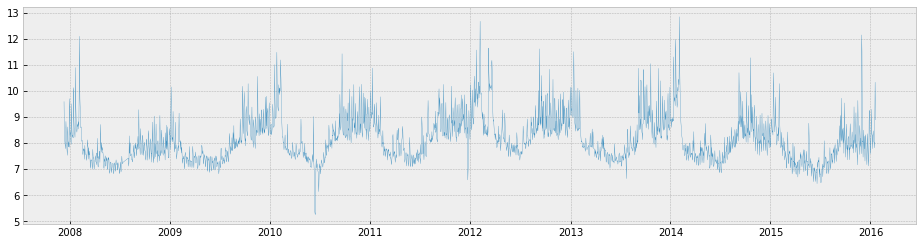

In [105]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(df_full['ds'], df_full['y'], lw=0.3)
    fig.show()

## Train / Val split

Разобьем на валидационную и тренировочную выборки. Размер валидационной выборки равен длительности предсказания моделью (см. параметр cfg.prediction_period).

In [106]:
df_train = df_full.iloc[:-cfg.prediction_period]
df_val = df_full.iloc[-cfg.prediction_period:]
df_train.shape, df_val.shape

((2599, 2), (365, 2))

In [108]:
assert df_train.shape[0] + df_val.shape[0] == df_full.shape[0]

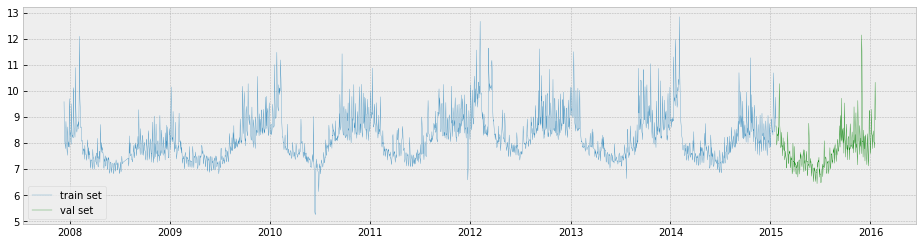

In [109]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(df_train['ds'], df_train['y'], label="train set", lw=0.3)
    ax.plot(df_val['ds'], df_val['y'], label="val set", c='green', lw=0.3)
    ax.legend()
    fig.show()

## Baseline

### Train the model and predict

In [110]:
model = Prophet()
model.fit(df_train)

future = model.make_future_dataframe(periods=cfg.prediction_period)
forecast = model.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [111]:
baseline_prediciton = df_val.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], how='left', on='ds')
baseline_prediciton.tail()

,ds,y,yhat,yhat_lower,yhat_upper
360,2016-01-16,7.817223,8.643909,7.856744,9.361421
361,2016-01-17,9.273878,9.043578,8.324337,9.762706
362,2016-01-18,10.333775,9.342255,8.668012,10.074162
363,2016-01-19,9.125871,9.131862,8.438064,9.846475
364,2016-01-20,8.891374,8.975136,8.263105,9.686938


### Plot the results

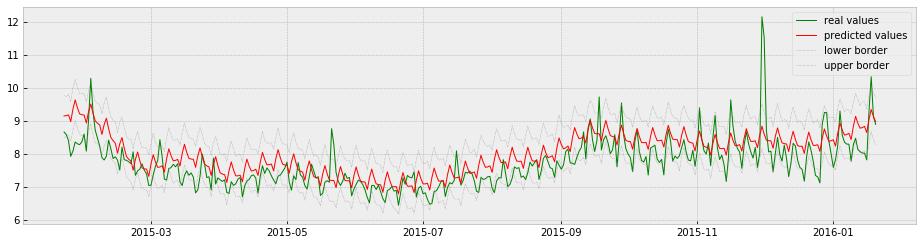

In [112]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(df_val['ds'], df_val['y'], label="real values", c='green', lw=1)
    ax.plot(baseline_prediciton['ds'], baseline_prediciton['yhat'], label="predicted values", c='red', lw=1)
    ax.plot(baseline_prediciton['ds'], baseline_prediciton['yhat_lower'], label="lower border", c='grey', lw=0.5, ls=':')
    ax.plot(baseline_prediciton['ds'], baseline_prediciton['yhat_upper'], label="upper border", c='grey', lw=0.5, ls=':')
    ax.legend()
    fig.show()

### MAPE calculation

In [115]:
mape_baseline = mean_absolute_percentage_error(baseline_prediciton['y'], baseline_prediciton['yhat'])
print('MAPE value is: {:.2f}'.format(mape_baseline))

MAPE value is: 0.06


## Optimization with optuna

### Find best params

In [148]:
class Objective():
    def __init__(
        self,
        df: pd.DataFrame, 
        prediction_period: int = 365,
        horizon: str = '365 days', 
        period: str = '180 days',
        initial: str = '730 days'
    ):
        self.df = df
        self.prediction_period = prediction_period
        self.horizon = horizon
        self.period = period
        self.initial = initial
        return
    
    def __call__(self, trial):
        # sample the hyperparameters
        changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 100)
        seasonality_prior_scale = trial.suggest_loguniform('seasonality_prior_scale', 0.01, 100)
        holidays_prior_scale = trial.suggest_loguniform('holidays_prior_scale', 0.01, 100)
        n_changepoints = trial.suggest_int('n_changepoints', low=10, high=1500, step=1, log=True)
        holidays_country_name = trial.suggest_categorical('country_name', ['US', 'RU'])
        growth = trial.suggest_categorical('growth', ['linear', ])
        seasonality_mode = trial.suggest_categorical('seasonality_mode', ['additive', 'multiplicative'])
        
        # build the model
        model = Prophet(changepoint_prior_scale=changepoint_prior_scale,
                        seasonality_prior_scale=seasonality_prior_scale,
                        n_changepoints=n_changepoints, 
                        holidays_prior_scale=holidays_prior_scale, 
                        growth=growth, 
                        seasonality_mode=seasonality_mode)
        model.add_country_holidays(country_name=holidays_country_name)
        
        # fit the model
        model.fit(self.df)
        
        # execute cross validation
        # horizon - размер окна, на котором будет выполняться предсказание на шаге кросс валидации
        # period - шаг кросс валидации
        # initial - точка, характеризующая размер тренировочной выборки на первом шаге кросс валидации
        df_cv = cross_validation(model=model, 
                                 horizon=self.horizon,
                                 period=self.period, 
                                 initial=self.initial)
        pm = performance_metrics(df_cv, metrics=['mape'], rolling_window=1)
        return pm['mape'].values[0]

In [149]:
study = optuna.create_study(direction="minimize")
study.optimize(func=Objective(df=df_train), n_trials=100, show_progress_bar=True, catch=(ValueError, ))

[I 2022-05-24 15:22:01,335] A new study created in memory with name: no-name-dfe0d84d-c819-4428-bf19-281f1a6746b2
/root/base_envs/python-3-7/lib/python3.7/site-packages/optuna/progress_bar.py:46: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 15:45:03,603] Trial 0 finished with value: 0.4018779771755205 and parameters: {'changepoint_prior_scale': 1.8354782786059498, 'seasonality_prior_scale': 7.4623391071290675, 'holidays_prior_scale': 12.441096196078606, 'n_changepoints': 420, 'country_name': 'RU', 'growth': 'linear', 'seasonality_mode': 'multiplicative'}. Best is trial 0 with value: 0.4018779771755205.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 15:51:17,691] Trial 1 finished with value: 0.23680105597963716 and parameters: {'changepoint_prior_scale': 18.21916149498047, 'seasonality_prior_scale': 0.2391388088305551, 'holidays_prior_scale': 0.527506207146022, 'n_changepoints': 76, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 1 with value: 0.23680105597963716.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 15:59:52,898] Trial 2 finished with value: 0.18720921943491356 and parameters: {'changepoint_prior_scale': 41.139808992168504, 'seasonality_prior_scale': 0.0228764910336042, 'holidays_prior_scale': 1.1905975526214438, 'n_changepoints': 142, 'country_name': 'RU', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 2 with value: 0.18720921943491356.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 16:02:04,300] Trial 3 finished with value: 0.07327584341550385 and parameters: {'changepoint_prior_scale': 0.01516597086968291, 'seasonality_prior_scale': 0.051092098708977886, 'holidays_prior_scale': 0.03409549586209552, 'n_changepoints': 28, 'country_name': 'RU', 'growth': 'linear', 'seasonality_mode': 'multiplicative'}. Best is trial 3 with value: 0.07327584341550385.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 16:04:40,297] Trial 4 finished with value: 0.17285880913133556 and parameters: {'changepoint_prior_scale': 0.8232410744223495, 'seasonality_prior_scale': 68.60254463552948, 'holidays_prior_scale': 3.3546074728677344, 'n_changepoints': 25, 'country_name': 'RU', 'growth': 'linear', 'seasonality_mode': 'multiplicative'}. Best is trial 3 with value: 0.07327584341550385.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 16:13:21,986] Trial 5 finished with value: 0.6768277625280318 and parameters: {'changepoint_prior_scale': 63.98192769647817, 'seasonality_prior_scale': 7.75424356888035, 'holidays_prior_scale': 12.343491138809123, 'n_changepoints': 143, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'multiplicative'}. Best is trial 3 with value: 0.07327584341550385.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 16:16:23,299] Trial 6 finished with value: 0.07813447217401245 and parameters: {'changepoint_prior_scale': 0.023738379114420952, 'seasonality_prior_scale': 98.93735697836429, 'holidays_prior_scale': 5.9991149091809435, 'n_changepoints': 84, 'country_name': 'RU', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 3 with value: 0.07327584341550385.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 634.
INFO:fbprophet:n_changepoints greater than number of observations.Using 778.


[I 2022-05-24 16:34:10,382] Trial 7 finished with value: 0.07701413556561167 and parameters: {'changepoint_prior_scale': 0.016730649909582465, 'seasonality_prior_scale': 18.837585379663402, 'holidays_prior_scale': 0.013449091243402099, 'n_changepoints': 833, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 3 with value: 0.07327584341550385.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 634.
INFO:fbprophet:n_changepoints greater than number of observations.Using 778.


[I 2022-05-24 17:27:02,311] Trial 8 finished with value: 0.15891876769014524 and parameters: {'changepoint_prior_scale': 0.605811122797076, 'seasonality_prior_scale': 4.801932727247924, 'holidays_prior_scale': 0.21802833298737131, 'n_changepoints': 857, 'country_name': 'RU', 'growth': 'linear', 'seasonality_mode': 'multiplicative'}. Best is trial 3 with value: 0.07327584341550385.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 17:37:49,497] Trial 9 finished with value: 0.2848218395361493 and parameters: {'changepoint_prior_scale': 1.2028197114049544, 'seasonality_prior_scale': 3.490347567201477, 'holidays_prior_scale': 1.5352788120801903, 'n_changepoints': 183, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'multiplicative'}. Best is trial 3 with value: 0.07327584341550385.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 17:39:59,404] Trial 10 finished with value: 0.09461816470726148 and parameters: {'changepoint_prior_scale': 0.08873294930999549, 'seasonality_prior_scale': 0.015065852954186514, 'holidays_prior_scale': 0.013797825251114055, 'n_changepoints': 10, 'country_name': 'RU', 'growth': 'linear', 'seasonality_mode': 'multiplicative'}. Best is trial 3 with value: 0.07327584341550385.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 17:42:16,485] Trial 11 finished with value: 0.07194634283875787 and parameters: {'changepoint_prior_scale': 0.010793853319874093, 'seasonality_prior_scale': 0.13043864023919066, 'holidays_prior_scale': 0.010976135688787903, 'n_changepoints': 26, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 11 with value: 0.07194634283875787.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 17:44:38,295] Trial 12 finished with value: 0.08113770334594142 and parameters: {'changepoint_prior_scale': 0.10983726004969298, 'seasonality_prior_scale': 0.1285841100464419, 'holidays_prior_scale': 0.08542906352514822, 'n_changepoints': 20, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 11 with value: 0.07194634283875787.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 17:47:01,900] Trial 13 finished with value: 0.07099182527867051 and parameters: {'changepoint_prior_scale': 0.010555950944482076, 'seasonality_prior_scale': 0.08294023188298293, 'holidays_prior_scale': 0.04741008652951254, 'n_changepoints': 34, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 17:49:17,424] Trial 14 finished with value: 0.08835935668028667 and parameters: {'changepoint_prior_scale': 0.07243813646076931, 'seasonality_prior_scale': 0.6049207073820502, 'holidays_prior_scale': 68.18597847279919, 'n_changepoints': 10, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 17:51:51,498] Trial 15 finished with value: 0.07165239890395256 and parameters: {'changepoint_prior_scale': 0.010643600461087626, 'seasonality_prior_scale': 0.10893668112160723, 'holidays_prior_scale': 0.05322342132885173, 'n_changepoints': 47, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 17:55:03,102] Trial 16 finished with value: 0.09177655242752916 and parameters: {'changepoint_prior_scale': 0.2526468219433532, 'seasonality_prior_scale': 0.7577091013442709, 'holidays_prior_scale': 0.0695149624122833, 'n_changepoints': 46, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 17:58:37,797] Trial 17 finished with value: 0.18310065874745568 and parameters: {'changepoint_prior_scale': 6.621151427669201, 'seasonality_prior_scale': 0.06199937824183858, 'holidays_prior_scale': 0.23059223600171946, 'n_changepoints': 40, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 18:00:49,775] Trial 18 finished with value: 0.08217777036485889 and parameters: {'changepoint_prior_scale': 0.035598028388776355, 'seasonality_prior_scale': 0.03264424981485012, 'holidays_prior_scale': 0.038727207117978966, 'n_changepoints': 15, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 18:07:02,585] Trial 19 finished with value: 0.08299446659058901 and parameters: {'changepoint_prior_scale': 0.04385309671106702, 'seasonality_prior_scale': 0.27445747851917734, 'holidays_prior_scale': 0.2508248648019117, 'n_changepoints': 264, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 18:10:42,897] Trial 20 finished with value: 0.11606705864907056 and parameters: {'changepoint_prior_scale': 0.27334897715341544, 'seasonality_prior_scale': 0.010386516738158711, 'holidays_prior_scale': 0.07792831852342103, 'n_changepoints': 55, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 18:13:06,795] Trial 21 finished with value: 0.0713450080729062 and parameters: {'changepoint_prior_scale': 0.010672815374340026, 'seasonality_prior_scale': 0.12504459199038565, 'holidays_prior_scale': 0.010144265140034608, 'n_changepoints': 34, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 18:15:58,385] Trial 22 finished with value: 0.07261217081954013 and parameters: {'changepoint_prior_scale': 0.011930975571275617, 'seasonality_prior_scale': 0.0911156258054683, 'holidays_prior_scale': 0.02665886114677034, 'n_changepoints': 70, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 18:18:23,693] Trial 23 finished with value: 0.0719181296905894 and parameters: {'changepoint_prior_scale': 0.010675825835524363, 'seasonality_prior_scale': 0.305808157271643, 'holidays_prior_scale': 0.011470360293678305, 'n_changepoints': 36, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 18:20:33,577] Trial 24 finished with value: 0.08305399010735873 and parameters: {'changepoint_prior_scale': 0.03877421750421758, 'seasonality_prior_scale': 1.6092001671938492, 'holidays_prior_scale': 0.11211816364457511, 'n_changepoints': 15, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 18:24:45,594] Trial 25 finished with value: 0.08342945346492596 and parameters: {'changepoint_prior_scale': 0.17820492718345352, 'seasonality_prior_scale': 0.035696193203891995, 'holidays_prior_scale': 0.021702555791778846, 'n_changepoints': 97, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 18:27:24,786] Trial 26 finished with value: 0.07168494419510148 and parameters: {'changepoint_prior_scale': 0.010483485297966097, 'seasonality_prior_scale': 0.20435724915450973, 'holidays_prior_scale': 0.047530870982140386, 'n_changepoints': 55, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 18:29:32,430] Trial 27 finished with value: 0.07740414867837074 and parameters: {'changepoint_prior_scale': 0.025186510869780975, 'seasonality_prior_scale': 0.5205196462482393, 'holidays_prior_scale': 0.41863767805867347, 'n_changepoints': 14, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 18:31:59,888] Trial 28 finished with value: 0.08449158079062188 and parameters: {'changepoint_prior_scale': 0.05221352144048541, 'seasonality_prior_scale': 1.8186960608293994, 'holidays_prior_scale': 0.13442539392421718, 'n_changepoints': 30, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 18:34:34,890] Trial 29 finished with value: 0.19790925233592463 and parameters: {'changepoint_prior_scale': 4.383399254678106, 'seasonality_prior_scale': 0.07311385395686763, 'holidays_prior_scale': 0.021699091342448552, 'n_changepoints': 20, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 18:37:18,094] Trial 30 finished with value: 0.07793351873715507 and parameters: {'changepoint_prior_scale': 0.023760523875322334, 'seasonality_prior_scale': 0.02333921929785194, 'holidays_prior_scale': 62.934216147626266, 'n_changepoints': 57, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 18:39:53,296] Trial 31 finished with value: 0.0718540670181646 and parameters: {'changepoint_prior_scale': 0.011329485475558577, 'seasonality_prior_scale': 0.1630217281804013, 'holidays_prior_scale': 0.0576768140804995, 'n_changepoints': 47, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 18:42:41,978] Trial 32 finished with value: 0.07111140062409879 and parameters: {'changepoint_prior_scale': 0.01055619764366347, 'seasonality_prior_scale': 0.33809490227742783, 'holidays_prior_scale': 0.0433048867492736, 'n_changepoints': 64, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 18:46:12,087] Trial 33 finished with value: 0.07672968402133917 and parameters: {'changepoint_prior_scale': 0.020068042102443975, 'seasonality_prior_scale': 0.31248651164958924, 'holidays_prior_scale': 0.6485950084501191, 'n_changepoints': 115, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 18:49:05,395] Trial 34 finished with value: 0.07103389902806846 and parameters: {'changepoint_prior_scale': 0.010430366855005643, 'seasonality_prior_scale': 0.4654298941568365, 'holidays_prior_scale': 0.027254453069040206, 'n_changepoints': 71, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 18:52:05,783] Trial 35 finished with value: 0.07930549479420047 and parameters: {'changepoint_prior_scale': 0.028950397966073554, 'seasonality_prior_scale': 0.4195480370274898, 'holidays_prior_scale': 0.021121166471929766, 'n_changepoints': 75, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 18:56:52,399] Trial 36 finished with value: 0.08389470173999601 and parameters: {'changepoint_prior_scale': 0.053564774764798914, 'seasonality_prior_scale': 1.2895185772601347, 'holidays_prior_scale': 0.010903925937867506, 'n_changepoints': 171, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 19:02:45,034] Trial 37 finished with value: 0.0766219311850168 and parameters: {'changepoint_prior_scale': 0.019001912763244064, 'seasonality_prior_scale': 0.04424301286071706, 'holidays_prior_scale': 0.03284079349799662, 'n_changepoints': 269, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 19:05:59,431] Trial 38 finished with value: 0.1798646190180063 and parameters: {'changepoint_prior_scale': 21.678006317042616, 'seasonality_prior_scale': 1.0819136338968862, 'holidays_prior_scale': 0.15664832887338567, 'n_changepoints': 35, 'country_name': 'RU', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 19:09:47,278] Trial 39 finished with value: 0.08146006594844464 and parameters: {'changepoint_prior_scale': 0.10719375984228192, 'seasonality_prior_scale': 2.567165622121597, 'holidays_prior_scale': 0.019898285713259727, 'n_changepoints': 98, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'multiplicative'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 19:12:29,000] Trial 40 finished with value: 0.07524169525567752 and parameters: {'changepoint_prior_scale': 0.016451306737416856, 'seasonality_prior_scale': 0.8026054382848875, 'holidays_prior_scale': 0.03335507231256269, 'n_changepoints': 68, 'country_name': 'RU', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 19:14:42,094] Trial 41 finished with value: 0.07187930948174098 and parameters: {'changepoint_prior_scale': 0.010740392396180132, 'seasonality_prior_scale': 0.09781526736695101, 'holidays_prior_scale': 0.049379711326599365, 'n_changepoints': 21, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 19:17:05,698] Trial 42 finished with value: 0.0749336726743011 and parameters: {'changepoint_prior_scale': 0.014577958986617272, 'seasonality_prior_scale': 0.19322657949986663, 'holidays_prior_scale': 0.016104773520594893, 'n_changepoints': 31, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 13 with value: 0.07099182527867051.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 19:19:33,675] Trial 43 finished with value: 0.07083619987497461 and parameters: {'changepoint_prior_scale': 0.010151036982623709, 'seasonality_prior_scale': 0.42661825393586067, 'holidays_prior_scale': 0.010181244353269827, 'n_changepoints': 42, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 19:27:18,918] Trial 44 finished with value: 0.2936397986330269 and parameters: {'changepoint_prior_scale': 96.85189306927157, 'seasonality_prior_scale': 0.32331687376410395, 'holidays_prior_scale': 0.011793646690982746, 'n_changepoints': 125, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 19:29:36,855] Trial 45 finished with value: 0.07903073744240584 and parameters: {'changepoint_prior_scale': 0.030690208093105933, 'seasonality_prior_scale': 0.4565833488313813, 'holidays_prior_scale': 0.030440045829298407, 'n_changepoints': 24, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'multiplicative'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 19:32:05,696] Trial 46 finished with value: 0.07541045155559914 and parameters: {'changepoint_prior_scale': 0.01751672366789173, 'seasonality_prior_scale': 0.1855344535033802, 'holidays_prior_scale': 0.010354393187266312, 'n_changepoints': 41, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 19:35:26,598] Trial 47 finished with value: 0.0848397648042148 and parameters: {'changepoint_prior_scale': 0.07312904938462952, 'seasonality_prior_scale': 0.7442393371021725, 'holidays_prior_scale': 0.1046920905729648, 'n_changepoints': 84, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 634.
INFO:fbprophet:n_changepoints greater than number of observations.Using 778.
INFO:fbprophet:n_changepoints greater than number of observations.Using 922.
INFO:fbprophet:n_changepoints greater than number of observations.Using 1066.


[I 2022-05-24 19:56:17,710] Trial 48 finished with value: 0.07559662204438013 and parameters: {'changepoint_prior_scale': 0.015476287000834399, 'seasonality_prior_scale': 0.05412856824481615, 'holidays_prior_scale': 1.5209360873402855, 'n_changepoints': 1171, 'country_name': 'RU', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 19:59:02,474] Trial 49 finished with value: 0.07112225728764106 and parameters: {'changepoint_prior_scale': 0.010214076382785636, 'seasonality_prior_scale': 0.14100321012684178, 'holidays_prior_scale': 0.01812489190674627, 'n_changepoints': 63, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 20:08:21,591] Trial 50 finished with value: 0.478548621080809 and parameters: {'changepoint_prior_scale': 2.9574763427200272, 'seasonality_prior_scale': 0.4318323540920256, 'holidays_prior_scale': 26.72372975201845, 'n_changepoints': 166, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'multiplicative'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 20:11:07,279] Trial 51 finished with value: 0.07095563532238892 and parameters: {'changepoint_prior_scale': 0.01015142677146035, 'seasonality_prior_scale': 0.12204682816205774, 'holidays_prior_scale': 0.01741163997522585, 'n_changepoints': 63, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 20:13:55,489] Trial 52 finished with value: 0.0793478418786785 and parameters: {'changepoint_prior_scale': 0.0269754127330196, 'seasonality_prior_scale': 0.24714025762015637, 'holidays_prior_scale': 0.015041720607365205, 'n_changepoints': 60, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 20:16:55,194] Trial 53 finished with value: 0.07459663059199664 and parameters: {'changepoint_prior_scale': 0.015067673000372542, 'seasonality_prior_scale': 0.1364823596376297, 'holidays_prior_scale': 0.015967885164286804, 'n_changepoints': 86, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 20:19:26,998] Trial 54 finished with value: 0.07693193270601344 and parameters: {'changepoint_prior_scale': 0.02145159481037427, 'seasonality_prior_scale': 0.08995286394658061, 'holidays_prior_scale': 3.1179206479371633, 'n_changepoints': 45, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 20:22:26,680] Trial 55 finished with value: 0.08614354779987846 and parameters: {'changepoint_prior_scale': 0.05621662014864546, 'seasonality_prior_scale': 0.016560714486316984, 'holidays_prior_scale': 0.04097614245586164, 'n_changepoints': 65, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 20:25:50,590] Trial 56 finished with value: 0.07123596236253872 and parameters: {'changepoint_prior_scale': 0.010024161947053628, 'seasonality_prior_scale': 0.0761571188238204, 'holidays_prior_scale': 0.07227010653940305, 'n_changepoints': 114, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 20:28:33,575] Trial 57 finished with value: 0.08113358644212713 and parameters: {'changepoint_prior_scale': 0.037167768790268334, 'seasonality_prior_scale': 0.7249916423999347, 'holidays_prior_scale': 0.024327077137100632, 'n_changepoints': 53, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 20:31:41,612] Trial 58 finished with value: 0.07097141536444282 and parameters: {'changepoint_prior_scale': 0.010012632760364456, 'seasonality_prior_scale': 27.873434355913666, 'holidays_prior_scale': 0.05688482080240257, 'n_changepoints': 94, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 20:37:47,883] Trial 59 finished with value: 0.12673680624875575 and parameters: {'changepoint_prior_scale': 0.4785622463388662, 'seasonality_prior_scale': 52.06690211168917, 'holidays_prior_scale': 0.0670957801578403, 'n_changepoints': 98, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 20:42:58,293] Trial 60 finished with value: 0.07545784815778661 and parameters: {'changepoint_prior_scale': 0.015411921589766961, 'seasonality_prior_scale': 2.5053915396710544, 'holidays_prior_scale': 0.3183148950436238, 'n_changepoints': 233, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 20:45:52,281] Trial 61 finished with value: 0.07410077036084163 and parameters: {'changepoint_prior_scale': 0.01307822319270432, 'seasonality_prior_scale': 11.896574613334934, 'holidays_prior_scale': 0.04312463343628187, 'n_changepoints': 74, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 20:48:17,547] Trial 62 finished with value: 0.07130162604200868 and parameters: {'changepoint_prior_scale': 0.010007743349727373, 'seasonality_prior_scale': 0.3720039084140419, 'holidays_prior_scale': 0.15646864191901544, 'n_changepoints': 41, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 20:51:59,795] Trial 63 finished with value: 0.07741225513173373 and parameters: {'changepoint_prior_scale': 0.021769627329757513, 'seasonality_prior_scale': 26.218327274381235, 'holidays_prior_scale': 0.029730048465664922, 'n_changepoints': 129, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 20:54:21,189] Trial 64 finished with value: 0.0806534524673615 and parameters: {'changepoint_prior_scale': 0.03387474122032676, 'seasonality_prior_scale': 0.2514653122546245, 'holidays_prior_scale': 0.017380067098878973, 'n_changepoints': 27, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 20:56:59,786] Trial 65 finished with value: 0.07467793419045562 and parameters: {'changepoint_prior_scale': 0.013390300598350332, 'seasonality_prior_scale': 0.14759993233509755, 'holidays_prior_scale': 0.05683571863698053, 'n_changepoints': 51, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 21:00:01,593] Trial 66 finished with value: 0.07191051968691607 and parameters: {'changepoint_prior_scale': 0.010684641571105694, 'seasonality_prior_scale': 5.301238992902916, 'holidays_prior_scale': 0.02763450844682281, 'n_changepoints': 85, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 21:08:07,284] Trial 67 finished with value: 0.16981417960960096 and parameters: {'changepoint_prior_scale': 1.481334121460864, 'seasonality_prior_scale': 0.6355044618057014, 'holidays_prior_scale': 0.09922607937706412, 'n_changepoints': 144, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 21:10:55,730] Trial 68 finished with value: 0.07691229552377847 and parameters: {'changepoint_prior_scale': 0.0216361845498612, 'seasonality_prior_scale': 0.04186951062729881, 'holidays_prior_scale': 0.03827585729613838, 'n_changepoints': 64, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 21:13:22,189] Trial 69 finished with value: 0.08281937397753401 and parameters: {'changepoint_prior_scale': 0.045714357511062786, 'seasonality_prior_scale': 1.046835670425662, 'holidays_prior_scale': 0.013414343984208852, 'n_changepoints': 37, 'country_name': 'RU', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 21:17:31,389] Trial 70 finished with value: 0.08849779793433639 and parameters: {'changepoint_prior_scale': 0.16944170063876043, 'seasonality_prior_scale': 0.06499120908040128, 'holidays_prior_scale': 0.02353438842407673, 'n_changepoints': 103, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'multiplicative'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 21:20:26,795] Trial 71 finished with value: 0.07104347382572032 and parameters: {'changepoint_prior_scale': 0.010170364806218567, 'seasonality_prior_scale': 0.08120082363227185, 'holidays_prior_scale': 0.07903228945796924, 'n_changepoints': 77, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 21:23:22,691] Trial 72 finished with value: 0.0715175970314946 and parameters: {'changepoint_prior_scale': 0.010052258548853837, 'seasonality_prior_scale': 0.031228065854577432, 'holidays_prior_scale': 0.08480768322243362, 'n_changepoints': 80, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 21:26:04,876] Trial 73 finished with value: 0.07417161000793612 and parameters: {'changepoint_prior_scale': 0.013290417315904222, 'seasonality_prior_scale': 0.10420562721233326, 'holidays_prior_scale': 0.057273316794237965, 'n_changepoints': 59, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 21:28:41,889] Trial 74 finished with value: 0.07811703494195378 and parameters: {'changepoint_prior_scale': 0.0258419934855711, 'seasonality_prior_scale': 0.2007629160603344, 'holidays_prior_scale': 0.018296124507246467, 'n_changepoints': 50, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 21:31:35,105] Trial 75 finished with value: 0.07565640281514222 and parameters: {'changepoint_prior_scale': 0.018375239982907455, 'seasonality_prior_scale': 0.12134518777854324, 'holidays_prior_scale': 0.19683310994033235, 'n_changepoints': 72, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 21:33:53,091] Trial 76 finished with value: 0.07203220506562112 and parameters: {'changepoint_prior_scale': 0.010006191099401176, 'seasonality_prior_scale': 0.15680113508836918, 'holidays_prior_scale': 0.03805313965315496, 'n_changepoints': 32, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 21:36:23,886] Trial 77 finished with value: 0.07313619726248227 and parameters: {'changepoint_prior_scale': 0.013466820892412261, 'seasonality_prior_scale': 0.5545701877665875, 'holidays_prior_scale': 0.04914450601324813, 'n_changepoints': 46, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 21:39:47,231] Trial 78 finished with value: 0.07633727518573176 and parameters: {'changepoint_prior_scale': 0.01912354914749741, 'seasonality_prior_scale': 0.3374185397257199, 'holidays_prior_scale': 0.010063803870202566, 'n_changepoints': 107, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 21:42:01,790] Trial 79 finished with value: 0.07145021277194953 and parameters: {'changepoint_prior_scale': 0.010028272052960455, 'seasonality_prior_scale': 0.22580547630308864, 'holidays_prior_scale': 0.026318481927092907, 'n_changepoints': 23, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 21:48:05,596] Trial 80 finished with value: 0.1614105699139069 and parameters: {'changepoint_prior_scale': 9.142244535766459, 'seasonality_prior_scale': 0.05042434779183238, 'holidays_prior_scale': 0.12796820401731, 'n_changepoints': 87, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 21:51:34,695] Trial 81 finished with value: 0.07184173102094635 and parameters: {'changepoint_prior_scale': 0.010026146135512082, 'seasonality_prior_scale': 0.07187421312651594, 'holidays_prior_scale': 0.06647390700584124, 'n_changepoints': 117, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 21:55:26,005] Trial 82 finished with value: 0.07408485438262628 and parameters: {'changepoint_prior_scale': 0.013039419177286049, 'seasonality_prior_scale': 0.07490565455205123, 'holidays_prior_scale': 0.07882524087698609, 'n_changepoints': 144, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 22:00:31,180] Trial 83 finished with value: 0.07994649628172829 and parameters: {'changepoint_prior_scale': 0.029147157358296386, 'seasonality_prior_scale': 0.024841317316958426, 'holidays_prior_scale': 0.09279937281650032, 'n_changepoints': 211, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 22:03:17,981] Trial 84 finished with value: 0.07523047882530202 and parameters: {'changepoint_prior_scale': 0.018416104891731563, 'seasonality_prior_scale': 0.08452492045377433, 'holidays_prior_scale': 0.013096746473984573, 'n_changepoints': 65, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 22:05:55,407] Trial 85 finished with value: 0.07340150845674775 and parameters: {'changepoint_prior_scale': 0.012712068544761283, 'seasonality_prior_scale': 0.17751533223659724, 'holidays_prior_scale': 0.7739004779163856, 'n_changepoints': 56, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 22:08:21,598] Trial 86 finished with value: 0.07537529720341461 and parameters: {'changepoint_prior_scale': 0.01635031070394873, 'seasonality_prior_scale': 0.11273826851247595, 'holidays_prior_scale': 0.03174154242710519, 'n_changepoints': 38, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 22:11:33,378] Trial 87 finished with value: 0.07768133037698781 and parameters: {'changepoint_prior_scale': 0.023562155606437242, 'seasonality_prior_scale': 0.29914756302032103, 'holidays_prior_scale': 0.021177412866082747, 'n_changepoints': 93, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 22:14:16,881] Trial 88 finished with value: 0.07102262448395277 and parameters: {'changepoint_prior_scale': 0.010200934972124964, 'seasonality_prior_scale': 0.05589749725443773, 'holidays_prior_scale': 0.06351141121754086, 'n_changepoints': 76, 'country_name': 'RU', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 22:16:57,979] Trial 89 finished with value: 0.07264349871593048 and parameters: {'changepoint_prior_scale': 0.01182645800441212, 'seasonality_prior_scale': 0.053741121161168276, 'holidays_prior_scale': 0.045795187907558356, 'n_changepoints': 71, 'country_name': 'RU', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 22:19:47,681] Trial 90 finished with value: 0.07499964068228743 and parameters: {'changepoint_prior_scale': 0.01572749221999218, 'seasonality_prior_scale': 0.4588147415525954, 'holidays_prior_scale': 0.019238773057156575, 'n_changepoints': 76, 'country_name': 'RU', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 22:22:57,798] Trial 91 finished with value: 0.07157771862308461 and parameters: {'changepoint_prior_scale': 0.010465369165026328, 'seasonality_prior_scale': 0.03728073762449631, 'holidays_prior_scale': 0.0745432901858696, 'n_changepoints': 106, 'country_name': 'RU', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 22:25:16,495] Trial 92 finished with value: 0.07298804724111364 and parameters: {'changepoint_prior_scale': 0.012488190966695446, 'seasonality_prior_scale': 0.08278753720550891, 'holidays_prior_scale': 0.059459710488984324, 'n_changepoints': 41, 'country_name': 'RU', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 22:27:53,586] Trial 93 finished with value: 0.07138464449918999 and parameters: {'changepoint_prior_scale': 0.010170800629294322, 'seasonality_prior_scale': 0.0585756361057963, 'holidays_prior_scale': 0.15463214569282616, 'n_changepoints': 63, 'country_name': 'RU', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 22:31:37,783] Trial 94 finished with value: 0.07569905953468221 and parameters: {'changepoint_prior_scale': 0.018777471452432623, 'seasonality_prior_scale': 0.13167035700677288, 'holidays_prior_scale': 0.03604934225407637, 'n_changepoints': 135, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 22:34:12,146] Trial 95 finished with value: 0.08056350958179997 and parameters: {'changepoint_prior_scale': 0.03138051717576522, 'seasonality_prior_scale': 0.02984559835952146, 'holidays_prior_scale': 0.12334757208112218, 'n_changepoints': 45, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 22:36:40,095] Trial 96 finished with value: 0.07333875725494031 and parameters: {'changepoint_prior_scale': 0.014619274437790736, 'seasonality_prior_scale': 0.8955956870988953, 'holidays_prior_scale': 0.19308916341295235, 'n_changepoints': 52, 'country_name': 'RU', 'growth': 'linear', 'seasonality_mode': 'multiplicative'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 22:39:49,199] Trial 97 finished with value: 0.07750761245405657 and parameters: {'changepoint_prior_scale': 0.022508074024646815, 'seasonality_prior_scale': 0.0182667293831889, 'holidays_prior_scale': 0.04814730644575163, 'n_changepoints': 89, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 22:43:25,798] Trial 98 finished with value: 0.08151925788386137 and parameters: {'changepoint_prior_scale': 0.03923025034332925, 'seasonality_prior_scale': 0.10326355935652326, 'holidays_prior_scale': 0.01514914689021499, 'n_changepoints': 119, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 9 forecasts with cutoffs between 2010-02-10 00:00:00 and 2014-01-20 00:00:00


[I 2022-05-24 22:47:30,828] Trial 99 finished with value: 0.07553286052696179 and parameters: {'changepoint_prior_scale': 0.01646046301892561, 'seasonality_prior_scale': 0.04287237373222724, 'holidays_prior_scale': 0.02511265063958549, 'n_changepoints': 157, 'country_name': 'US', 'growth': 'linear', 'seasonality_mode': 'additive'}. Best is trial 43 with value: 0.07083619987497461.



In [150]:
study.best_params

{'changepoint_prior_scale': 0.010151036982623709,
 'seasonality_prior_scale': 0.42661825393586067,
 'holidays_prior_scale': 0.010181244353269827,
 'n_changepoints': 42,
 'country_name': 'US',
 'growth': 'linear',
 'seasonality_mode': 'additive'}

### Train the model and predict

In [154]:
model = Prophet(changepoint_prior_scale=study.best_params['changepoint_prior_scale'],
                seasonality_prior_scale=study.best_params['seasonality_prior_scale'],
                n_changepoints=study.best_params['n_changepoints'], 
                holidays_prior_scale=study.best_params['holidays_prior_scale'], 
                growth=study.best_params['growth'], 
                seasonality_mode=study.best_params['seasonality_mode'])
model.add_country_holidays(country_name=study.best_params['country_name'])
model.fit(df_train)

future = model.make_future_dataframe(periods=cfg.prediction_period)
forecast = model.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [155]:
optimized_prediciton = df_val.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], how='left', on='ds')
optimized_prediciton.tail()

,ds,y,yhat,yhat_lower,yhat_upper
360,2016-01-16,7.817223,8.533176,7.917278,9.242941
361,2016-01-17,9.273878,8.930926,8.284299,9.591518
362,2016-01-18,10.333775,9.423535,8.711302,10.100867
363,2016-01-19,9.125871,9.017478,8.406063,9.671888
364,2016-01-20,8.891374,8.858983,8.235565,9.472322


### Plot the results

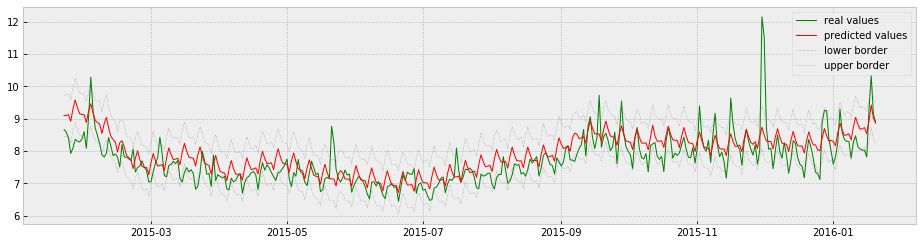

In [156]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(df_val['ds'], df_val['y'], label="real values", c='green', lw=1)
    ax.plot(optimized_prediciton['ds'], optimized_prediciton['yhat'], label="predicted values", c='red', lw=1)
    ax.plot(optimized_prediciton['ds'], optimized_prediciton['yhat_lower'], label="lower border", c='grey', lw=0.5, ls=':')
    ax.plot(optimized_prediciton['ds'], optimized_prediciton['yhat_upper'], label="upper border", c='grey', lw=0.5, ls=':')
    ax.legend()
    fig.show()

### MAPE calculation

In [157]:
mape_optimized = mean_absolute_percentage_error(optimized_prediciton['y'], optimized_prediciton['yhat'])
print('MAPE value is: {:.2f}'.format(mape_optimized))

MAPE value is: 0.05
